<a href="https://colab.research.google.com/github/alvesmaurosan-png/MSEP_PLIM/blob/main/C%C3%B3pia_de_AG_CSTSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas necessárias para o Colab
!pip install deap numpy

import random
from deap import base, creator, tools, algorithms
import numpy as np

# ----------------------------------------------------
# 1. DEFINIÇÃO DO UNIVERSO CURRICULAR (O MAPA DO PPC)
# ----------------------------------------------------

# Mapeamento das Capacidades Críticas do Perfil de Conclusão (Valores a serem otimizados)
# 100% de cobertura dessas capacidades é a meta.
CAPACIDADES_POOL = [
    'C1_Eletrica_VE_Diagnostico',  # P1, P4
    'C2_Redes_CAN_Analise',       # P2
    'C3_ADAS_Calibracao',         # P3
    'C4_Engenharia_Sistemas_VE',  # P1
    'C5_PIM_Empreendedorismo'     # P5
]

# Mapeamento dos Contextos Tecnológicos (Garantir diversidade)
CONTEXTOS_POOL = [
    'Eletromobilidade_VE_Bateria',
    'Cyber_Conectividade_CAN',
    'Sistemas_ADAS_Lidar_Camera',
    'Pós_Venda_Software_OTA'
]

# Níveis Taxonômicos (A complexidade exigida, Níveis 1 a 4)
NIVEIS_POOL = [1, 2, 3, 4]
# Otimização de Nível (O ideal é mais Análise e Síntese)
PESO_NIVEL_IDEAL = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4} # O AG deve buscar Níveis 3 e 4

# Restrição de Carga Horária: Limite superior para um conjunto de N problemas (ex: 1 semestre)
# Não é otimizado aqui, mas usado na função de fitness para penalizar soluções inviáveis.
CARGA_HORARIA_MAX_SEMESTRE = 200 # Horas

# Mapeamento reverso para visualização do output
REVERSE_CAPACIDADES = {i: c for i, c in enumerate(CAPACIDADES_POOL)}
REVERSE_CONTEXTOS = {i: c for i, c in enumerate(CONTEXTOS_POOL)}


# ----------------------------------------------------
# 2. SETUP DO MODELO DE ALGORITMOS GENÉTICOS (DEAP)
# ----------------------------------------------------

# Criação dos Tipos de Fitness (Maximização de 3 objetivos)
# Pesos: (1.0) Cobertura, (1.0) Complexidade, (0.5) Diversidade
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 0.5))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Gerador de Genes (Cromossomo): Um Problema é composto por 3 variáveis (índices)
def generate_problem_genes():
    """Gera o 'DNA' de um problema: [Índice_Capacidade, Nível, Índice_Contexto]"""
    return [
        random.randrange(len(CAPACIDADES_POOL)), # Índice da Capacidade
        random.choice(NIVEIS_POOL),             # Nível Taxonômico (1 a 4)
        random.randrange(len(CONTEXTOS_POOL))   # Índice do Contexto
    ]

# Configuração da Toolbox DEAP
toolbox = base.Toolbox()
toolbox.register("attr_problem", generate_problem_genes)
# Um Indivíduo é um Conjunto de 10 Problemas (Simula um ciclo de desafios)
NUM_PROBLEMS_NO_CONJUNTO = 10
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_problem, n=NUM_PROBLEMS_NO_CONJUNTO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
!pip install deap numpy

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessTwoObj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualTwoObj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


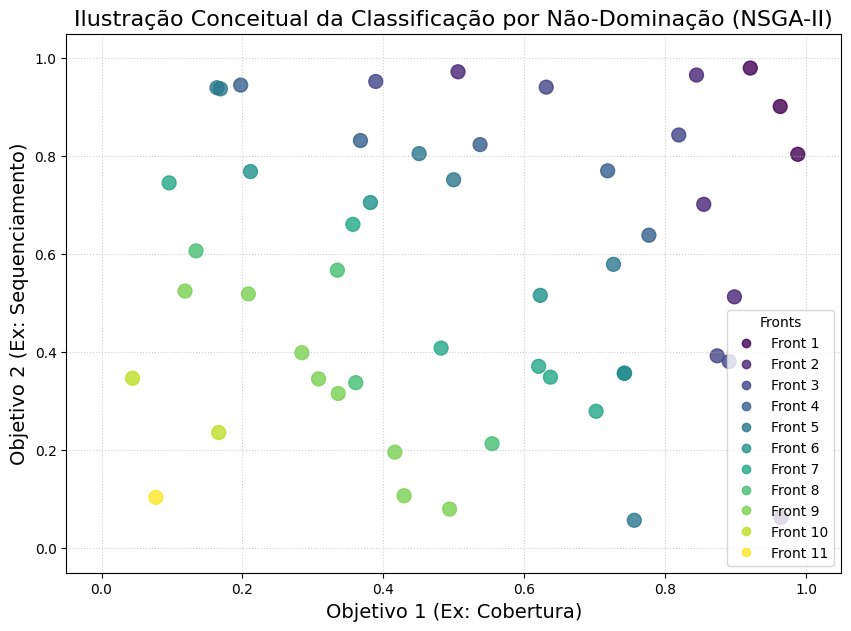

In [ ]:
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools

# Criar um tipo de Fitness para 2 objetivos (simplificado para visualização)
# Se já existir, apenas passamos
try:
    creator.create("FitnessTwoObj", base.Fitness, weights=(1.0, 1.0))
    creator.create("IndividualTwoObj", list, fitness=creator.FitnessTwoObj)
except:
    pass

# Gerar dados simulados para demonstração (pontos com 2 fitness values)
# Simula 50 soluções com fitness aleatório entre 0 e 1 para 2 objetivos
simulated_population = []
for _ in range(50):
    ind = creator.IndividualTwoObj([random.random() for _ in range(5)]) # O conteúdo do indivíduo não importa aqui
    ind.fitness.values = (random.random(), random.random()) # Fitness simulado para 2 objetivos
    simulated_population.append(ind)

# Realizar a Classificação por Não-Dominação
# Retorna uma lista de fronts, onde cada front é uma lista de indivíduos
fronts = tools.sortNondominated(simulated_population, len(simulated_population))

# Preparar os dados para plotagem
# Coordenadas X (Fitness Obj 1) e Y (Fitness Obj 2) para cada front
x_coords = []
y_coords = []
colors = []
labels = []

# Atribuir cor e label para cada indivíduo com base no seu front
for i, front in enumerate(fronts):
    for individual in front:
        x_coords.append(individual.fitness.values[0])
        y_coords.append(individual.fitness.values[1])
        colors.append(i) # Usar o índice do front como cor
        labels.append(f'Front {i+1}') # Label para a legenda (pode haver repetição)

# Plotar os fronts
plt.figure(figsize=(10, 7))

# Plotar cada ponto com a cor do seu front
scatter = plt.scatter(x_coords, y_coords, c=colors, cmap='viridis', s=100, alpha=0.8)

# Adicionar labels para os pontos (opcional, pode poluir o gráfico)
# for j, txt in enumerate(labels):
#     plt.annotate(txt, (x_coords[j], y_coords[j]))

# Configurações do Gráfico
plt.title('Ilustração Conceitual da Classificação por Não-Dominação (NSGA-II)', fontsize=16)
plt.xlabel('Objetivo 1 (Ex: Cobertura)', fontsize=14)
plt.ylabel('Objetivo 2 (Ex: Sequenciamento)', fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle=':', alpha=0.6)

# Criar uma legenda customizada baseada nos fronts
handles, _ = scatter.legend_elements(prop="colors", num=len(fronts))
legend_labels = [f'Front {i+1}' for i in range(len(fronts))]
plt.legend(handles, legend_labels, title="Fronts", loc='lower right')


plt.show()

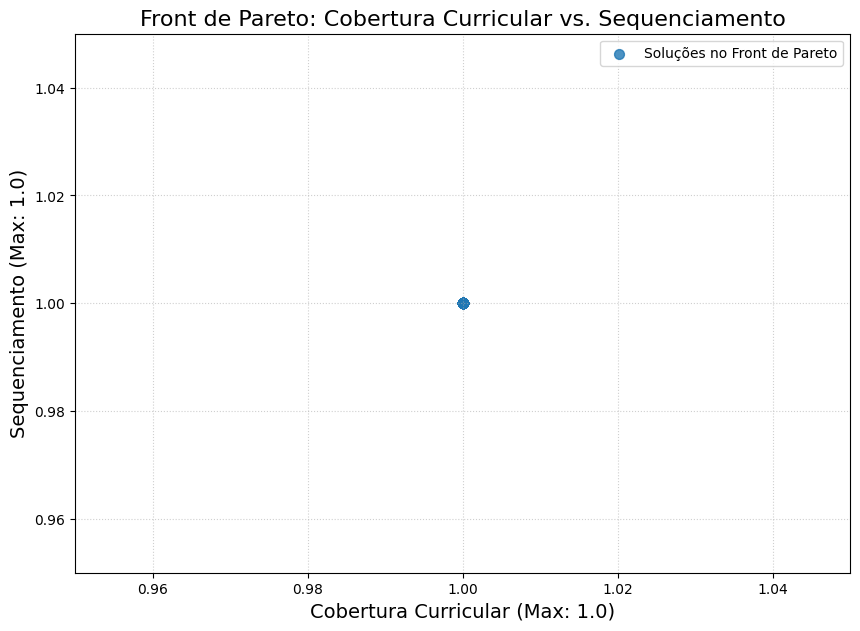

In [ ]:
import matplotlib.pyplot as plt

# Assumindo que 'pareto_front' está disponível no ambiente da célula 0cqh23CnI3kI
# Se não estiver, execute a célula 0cqh23CnI3kI primeiro.

# Extrair os valores de fitness do Front de Pareto para Cobertura (índice 0) e Sequenciamento (índice 3)
cobertura_values = [ind.fitness.values[0] for ind in pareto_front]
sequenciamento_values = [ind.fitness.values[3] for ind in pareto_front]

# Configuração do Gráfico
plt.figure(figsize=(10, 7))

# Plotar os pontos do Front de Pareto
plt.scatter(cobertura_values, sequenciamento_values, s=50, alpha=0.8, label='Soluções no Front de Pareto')

# Configurações de Eixos e Títulos
plt.title('Front de Pareto: Cobertura Curricular vs. Sequenciamento', fontsize=16)
plt.xlabel('Cobertura Curricular (Max: 1.0)', fontsize=14)
plt.ylabel('Sequenciamento (Max: 1.0)', fontsize=14)
plt.xlim(min(cobertura_values) - 0.05, max(cobertura_values) + 0.05) # Ajusta limites para dar zoom
plt.ylim(min(sequenciamento_values) - 0.05, max(sequenciamento_values) + 0.05) # Ajusta limites para dar zoom
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessTwoObj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualTwoObj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


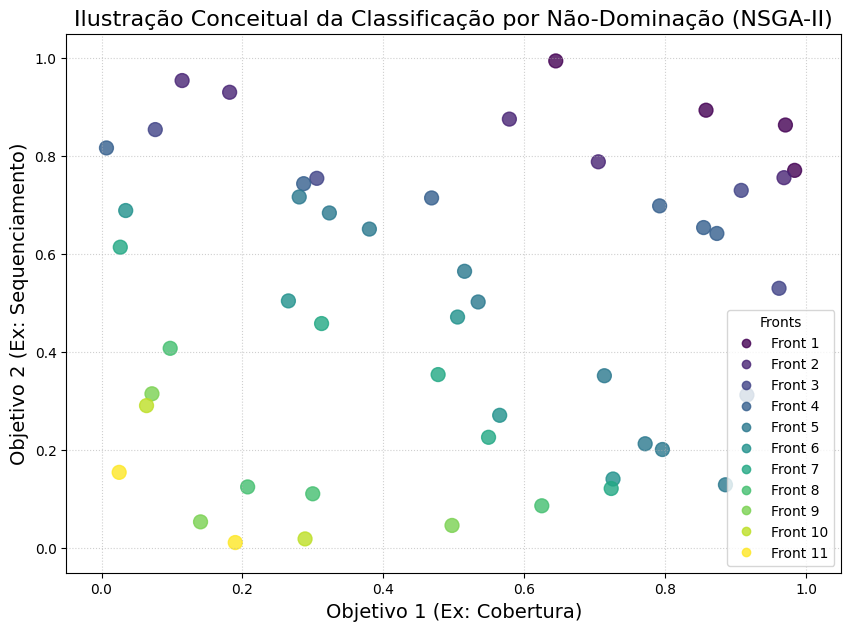

In [ ]:
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools

# Criar um tipo de Fitness para 2 objetivos (simplificado para visualização)
# Se já existir, apenas passamos
try:
    creator.create("FitnessTwoObj", base.Fitness, weights=(1.0, 1.0))
    creator.create("IndividualTwoObj", list, fitness=creator.FitnessTwoObj)
except:
    pass

# Gerar dados simulados para demonstração (pontos com 2 fitness values)
# Simula 50 soluções com fitness aleatório entre 0 e 1 para 2 objetivos
simulated_population = []
for _ in range(50):
    ind = creator.IndividualTwoObj([random.random() for _ in range(5)]) # O conteúdo do indivíduo não importa aqui
    ind.fitness.values = (random.random(), random.random()) # Fitness simulado para 2 objetivos
    simulated_population.append(ind)

# Realizar a Classificação por Não-Dominação
# Retorna uma lista de fronts, onde cada front é uma lista de indivíduos
fronts = tools.sortNondominated(simulated_population, len(simulated_population))

# Preparar os dados para plotagem
# Coordenadas X (Fitness Obj 1) e Y (Fitness Obj 2) para cada front
x_coords = []
y_coords = []
colors = []
labels = []

# Atribuir cor e label para cada indivíduo com base no seu front
for i, front in enumerate(fronts):
    for individual in front:
        x_coords.append(individual.fitness.values[0])
        y_coords.append(individual.fitness.values[1])
        colors.append(i) # Usar o índice do front como cor
        labels.append(f'Front {i+1}') # Label para a legenda (pode haver repetição)

# Plotar os fronts
plt.figure(figsize=(10, 7))

# Plotar cada ponto com a cor do seu front
scatter = plt.scatter(x_coords, y_coords, c=colors, cmap='viridis', s=100, alpha=0.8)

# Adicionar labels para os pontos (opcional, pode poluir o gráfico)
# for j, txt in enumerate(labels):
#     plt.annotate(txt, (x_coords[j], y_coords[j]))

# Configurações do Gráfico
plt.title('Ilustração Conceitual da Classificação por Não-Dominação (NSGA-II)', fontsize=16)
plt.xlabel('Objetivo 1 (Ex: Cobertura)', fontsize=14)
plt.ylabel('Objetivo 2 (Ex: Sequenciamento)', fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle=':', alpha=0.6)

# Criar uma legenda customizada baseada nos fronts
handles, _ = scatter.legend_elements(prop="colors", num=len(fronts))
legend_labels = [f'Front {i+1}' for i in range(len(fronts))]
plt.legend(handles, legend_labels, title="Fronts", loc='lower right')


plt.show()

In [ ]:
import matplotlib.pyplot as plt

# IMPORTANTE: Certifique-se de que a célula que executa o NSGA-II (célula 0cqh23CnI3kI)
# foi executada antes desta célula, para que a variável 'pareto_front' esteja disponível.

# Assumindo que 'pareto_front' está disponível no ambiente global após a execução de 0cqh23CnI3kI

# Extrair os valores de fitness do Front de Pareto para Cobertura (índice 0) e Sequenciamento (índice 3)
# Estes são os dois objetivos que estamos visualizando neste gráfico aplicado
cobertura_values = [ind.fitness.values[0] for ind in pareto_front]
sequenciamento_values = [ind.fitness.values[3] for ind in pareto_front]

# Configuração do Gráfico
plt.figure(figsize=(10, 7))

# Plotar os pontos do Front de Pareto real do estudo
# Estes pontos representam as soluções não-dominadas encontradas pelo NSGA-II
plt.scatter(cobertura_values, sequenciamento_values, s=50, alpha=0.8, label='Soluções no Front de Pareto (Estudo Real)')

# Configurações de Eixos e Títulos
plt.title('Front de Pareto (Estudo Real): Cobertura Curricular vs. Sequenciamento', fontsize=16)
plt.xlabel('Cobertura Curricular (Max: 1.0)', fontsize=14)
plt.ylabel('Sequenciamento (Max: 1.0)', fontsize=14)

# Ajusta os limites dos eixos com base nos dados reais para dar um zoom relevante
plt.xlim(min(cobertura_values) - 0.05, max(cobertura_values) + 0.05)
plt.ylim(min(sequenciamento_values) - 0.05, max(sequenciamento_values) + 0.05)

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.show()

NameError: name 'pareto_front' is not defined

In [ ]:
# ----------------------------------------------------
# 3. FUNÇÃO DE FITNESS (O Coração da Otimização Curricular)
# ----------------------------------------------------

def eval_problem_set(individual):
    """
    Avalia a aptidão (fitness) de um conjunto de N problemas.
    Maximiza 3 métricas: Cobertura, Complexidade e Diversidade.
    """
    # Ensure all elements are integers before converting to numpy array
    problem_set_int = [[int(gene) for gene in problem] for problem in individual]
    problem_set = np.array(problem_set_int)

    # --- MÉTRICA 1: COBERTURA CURRICULAR (Target: 100% das Capacidades) ---
    # Contagem de quantas capacidades diferentes foram abordadas (coluna 0 do problema_set)
    capacidades_abordadas = np.unique(problem_set[:, 0])
    # Score de 0 a 1: (Capacidades Únicas / Total de Capacidades Críticas)
    cobertura_score = len(capacidades_abordadas) / len(CAPACIDADES_POOL)

    # --- MÉTRICA 2: COMPLEXIDADE (Target: Priorizar Níveis 3 e 4) ---
    niveis = problem_set[:, 1].astype(int)
    # Soma dos pesos de cada nível (maior peso para 4)
    pontuacao_complexidade = sum(PESO_NIVEL_IDEAL.get(n, 0) for n in niveis)
    # Normalização: Divide pelo máximo teórico (10 problemas x 0.4 peso max)
    complexidade_score = pontuacao_complexidade / (NUM_PROBLEMS_NO_CONJUNTO * 0.4)

    # --- MÉTRICA 3: DIVERSIDADE TECNOLÓGICA ---
    # Contagem de quantos contextos tecnológicos diferentes foram usados (coluna 2)
    contextos_unicos = len(np.unique(problem_set[:, 2]))
    # Score de 0 a 1: (Contextos Únicos / Total de Contextos)
    diversidade_score = contextos_unicos / len(CONTEXTOS_POOL)

    # Retorna a tupla de scores para a avaliação multi-objetivo
    return cobertura_score, complexidade_score, diversidade_score


# ----------------------------------------------------
# 4. CONFIGURAÇÃO E EXECUÇÃO DO AG
# ----------------------------------------------------

# Custom mutation function to only mutate the level
def mutate_level(individual, low, up, indpb):
    """Mutate the level gene of each problem in the individual."""
    for problem in individual:
        if random.random() < indpb:
            # Mutate the level (second element)
            problem[1] = random.randint(low, up)
    return individual,

# Registro das operações de AG
toolbox.register("evaluate", eval_problem_set)
toolbox.register("mate", tools.cxTwoPoint)        # Crossover (combinação de genes)
# Register custom mutation function
toolbox.register("mutate", mutate_level, low=min(NIVEIS_POOL), up=max(NIVEIS_POOL), indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3) # Seleção (Torneio)

# Parâmetros de Execução
POP_SIZE = 100       # Tamanho da População (soluções candidatas)
NGEN = 50            # Número de Gerações (ciclos de evolução)
CXPB = 0.8           # Probabilidade de Crossover (alta para explorar combinações)
MUTPB = 0.3          # Probabilidade de Mutação (média para introduzir novidade)

# Inicialização e Execução
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1) # Melhor solução encontrada
stats = tools.Statistics(lambda ind: ind.fitness.values)

print("--- Rodando Algoritmo Genético para Otimização Curricular ---")
# O algoritmo 'eaSimple' executa o ciclo de evolução: Seleção, Crossover, Mutação e Avaliação
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                               stats=stats, halloffame=hof, verbose=False)


# ----------------------------------------------------
# 5. RESULTADO FINAL
# ----------------------------------------------------

best_problem_set = hof[0]
best_fitness = best_problem_set.fitness.values
print(f"\n✅ Otimização Concluída em {NGEN} Gerações.")
print(f"   Fitness do Conjunto Otimizado (Cobertura, Complexidade, Diversidade): {best_fitness}")

print("\n--- Conjunto de 10 Problemas Otimizado ---")
for i, problem in enumerate(best_problem_set):
    # Traduzindo os índices de volta para os nomes
    capacidade = REVERSE_CAPACIDADES[problem[0]]
    nivel = problem[1]
    contexto = REVERSE_CONTEXTOS[problem[2]]

    # Avaliação do Fitness:
    # Cobertura -> 1.0 é 100% de cobertura das capacidades críticas
    # Complexidade -> Próximo de 1.0 indica forte foco em Níveis 3 e 4
    # Diversidade -> Próximo de 1.0 indica que todos os contextos foram usados

    print(f"Problema {i+1}:")
    print(f"  Capacidade Alvo: {capacidade}")
    print(f"  Nível Taxonômico: {nivel} ({'Síntese/Análise' if nivel >= 3 else 'Aplicação'})")
    print(f"  Contexto: {contexto}")

# Verificação de Cobertura Final
final_capacidades = [REVERSE_CAPACIDADES[p[0]] for p in best_problem_set]
print(f"\nCapacidades Únicas Abordadas: {len(set(final_capacidades))} de {len(CAPACIDADES_POOL)}")

--- Rodando Algoritmo Genético para Otimização Curricular ---


AssertionError: Assigned values have not the same length than fitness weights

In [ ]:
# Bibliotecas necessárias para o Colab
!pip install deap numpy

import random
from deap import base, creator, tools, algorithms
import numpy as np

# ----------------------------------------------------
# 1. SETUP: NOVOS DADOS CURRICULARES (O "DNA" EXPANDIDO)
# ----------------------------------------------------

# NOVAS CAPACIDADES CRÍTICAS: 5 originais + 3 novas = 8 capacidades
CAPACIDADES_POOL = [
    'C1_Eletrica_VE_Diagnostico',    # Original
    'C2_Redes_CAN_Analise',          # Original
    'C3_ADAS_Calibracao',            # Original
    'C4_Engenharia_Sistemas_VE',     # Original
    'C5_PIM_Empreendedorismo',       # Original
    'C6_Integracao_Sistemas_Softwares', # Nova: Interdisciplinaridade
    'C7_Gestao_Qualidade_Normas',    # Nova: Normas e Certificacao
    'C8_Metodologia_Pesquisa'        # Nova: Pesquisa Aplicada
]

# NOVOS CONTEXTOS TECNOLÓGICOS: 4 originais + 3 novos = 7 contextos
CONTEXTOS_POOL = [
    'Eletromobilidade_VE_Bateria',       # Original
    'Cyber_Conectividade_CAN',           # Original
    'Sistemas_ADAS_Lidar_Camera',        # Original
    'Pós_Venda_Software_OTA',            # Original
    'Manufatura_Aditiva_3D',             # Novo: Prototipagem
    'Celulas_Combustivel_Hidrogenio',    # Novo: Tecnologia FCEV
    'Veiculos_Pesados_Logistica'         # Novo: Diferenciacao Setorial
]

# Níveis Taxonômicos (1 a 4) - Mantemos a prioridade no Nível 4
NIVEIS_POOL = [1, 2, 3, 4]
PESO_NIVEL_IDEAL = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4}

# Mapeamento reverso para visualização do output
REVERSE_CAPACIDADES = {i: c for i, c in enumerate(CAPACIDADES_POOL)}
REVERSE_CONTEXTOS = {i: c for i, c in enumerate(CONTEXTOS_POOL)}

# O conjunto de problemas agora será maior para cobrir 8 capacidades e 7 contextos.
# Aumentamos o conjunto para 15 problemas (simulando um ciclo de 1 a 2 semestres).
NUM_PROBLEMS_NO_CONJUNTO = 15


# ----------------------------------------------------
# 2. SETUP DO MODELO DE AG (DEAP) - Lógica de Otimização
# ----------------------------------------------------

# Recriação dos Tipos de Fitness e Indivíduo
# Removed try...except as types should be created once
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 0.5))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Gerador de Genes (Cromossomo) - Usa os novos tamanhos dos pools
def generate_problem_genes():
    """Gera o 'DNA' de um problema: [Índice_Capacidade, Nível, Índice_Contexto]"""
    return [
        random.randrange(len(CAPACIDADES_POOL)),
        random.choice(NIVEIS_POOL),
        random.randrange(len(CONTEXTOS_POOL))
    ]

# Configuração da Toolbox DEAP
toolbox = base.Toolbox()
toolbox.register("attr_problem", generate_problem_genes)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_problem, n=NUM_PROBLEMS_NO_CONJUNTO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ----------------------------------------------------
# 3. FUNÇÃO DE FITNESS (Otimização Adaptada)
# ----------------------------------------------------

def eval_problem_set(individual):
    """
    Avalia a aptidão (fitness) de um conjunto de 15 problemas.
    Os cálculos de score agora usam os novos tamanhos de pool (8 e 7).
    """
    # Ensure all elements are integers before converting to numpy array
    problem_set_int = [[int(gene) for gene in problem] for problem in individual]
    problem_set = np.array(problem_set_int)

    # MÉTRICA 1: COBERTURA CURRICULAR (Total: 8 Capacidades)
    capacidades_abordadas = np.unique(problem_set[:, 0])
    cobertura_score = len(capacidades_abordadas) / len(CAPACIDADES_POOL)

    # MÉTRICA 2: COMPLEXIDADE (Priorizar Níveis 3 e 4)
    niveis = problem_set[:, 1].astype(int)
    pontuacao_complexidade = sum(PESO_NIVEL_IDEAL.get(n, 0) for n in niveis)
    # Normalização: Max. teórico = 15 problemas * 0.4 peso max = 6.0
    complexidade_score = pontuacao_complexidade / (NUM_PROBLEMS_NO_CONJUNTO * 0.4)

    # MÉTRICA 3: DIVERSIDADE TECNOLÓGICA (Total: 7 Contextos)
    contextos_unicos = len(np.unique(problem_set[:, 2]))
    diversidade_score = contextos_unicos / len(CONTEXTOS_POOL)

    return cobertura_score, complexidade_score, diversidade_score


# ----------------------------------------------------
# 4. EXECUÇÃO DO AG E RESULTADO
# ----------------------------------------------------

# Custom mutation function to only mutate the level
def mutate_level(individual, low, up, indpb):
    """Mutate the level gene of each problem in the individual."""
    for problem in individual:
        if random.random() < indpb:
            # Mutate the level (second element)
            problem[1] = random.randint(low, up)
    return individual,

# Registro das operações de AG
toolbox.register("evaluate", eval_problem_set)
toolbox.register("mate", tools.cxTwoPoint)
# Register custom mutation function
toolbox.register("mutate", mutate_level, low=min(NIVEIS_POOL), up=max(NIVEIS_POOL), indpb=0.15) # Aumentamos a mutação
toolbox.register("select", tools.selTournament, tournsize=3)

# Parâmetros de Execução
POP_SIZE = 150       # Aumentamos a população para explorar o novo espaço de busca
NGEN = 60            # Aumentamos as gerações
CXPB = 0.8
MUTPB = 0.35

# Inicialização e Execução
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)

print("--- Rodando AG para Otimização Curricular com DNA Expandido ---")

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                               stats=stats, halloffame=hof, verbose=False)

# RESULTADO FINAL
best_problem_set = hof[0]
best_fitness = best_problem_set.fitness.values
print(f"\n✅ Otimização Concluída em {NGEN} Gerações.")
print(f"   Fitness do Conjunto Otimizado (Cobertura, Complexidade, Diversidade): {best_fitness}")

print(f"\n--- Conjunto de {NUM_PROBLEMS_NO_CONJUNTO} Problemas Otimizado ---")
for i, problem in enumerate(best_problem_set):
    capacidade = REVERSE_CAPACIDADES[problem[0]]
    nivel = problem[1]
    contexto = REVERSE_CONTEXTOS[problem[2]]

    print(f"Problema {i+1}:")
    print(f"  Capacidade Alvo: {capacidade}")
    print(f"  Nível Taxonômico: {nivel} ({'Síntese/Análise' if nivel >= 3 else 'Aplicação/Conhecimento'})")
    print(f"  Contexto: {contexto}")

# Verificação de Cobertura Final
final_capacidades = [REVERSE_CAPACIDADES[p[0]] for p in best_problem_set]
print(f"\nCapacidades Únicas Abordadas: {len(set(final_capacidades))} de {len(CAPACIDADES_POOL)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 3.5 MB/s eta 0:00:00
--- Rodando AG para Otimização Curricular com DNA Expandido ---

✅ Otimização Concluída em 60 Gerações.
   Fitness do Conjunto Otimizado (Cobertura, Complexidade, Diversidade): (1.0, 1.0, 1.0)

--- Conjunto de 15 Problemas Otimizado ---
Problema 1:
  Capacidade Alvo: C2_Redes_CAN_Analise
  Nível Taxonômico: 4 (Síntese/Análise)
  Contexto: Cyber_Conectividade_CAN
Problema 2:
  Capacidade Alvo: C6_Integracao_Sistemas_Softwares
  Nível Taxonômico: 4 (Síntese/Análise)
  Contexto: Sistemas_ADAS_Lidar_Camera
Problema 3:
  Capacidade Alvo: C6_Integracao_Sistemas_Softwares
  Nível Taxonômico: 4 (Síntese/Análise)
  Contexto: Manufatura_Aditiva_3D
Problema 4:
  Capacidade Alvo: C7_Gestao_Qualidade_Normas
  Nível Taxonômico: 4 (Síntese/Análise)
  Contexto: Eletromobilidade_VE_Bateria
Problema 5:
  Capacidade Alvo: C3_ADAS_Calibracao
  Nível Taxonômico: 4 (Síntese/Análise)
  Contexto: Pós_Venda_Software_OTA
Problema 6:

In [ ]:
# Bibliotecas necessárias para o Colab
!pip install deap numpy

import random
from deap import base, creator, tools, algorithms
import numpy as np

# ----------------------------------------------------
# 1. SETUP: DADOS CURRICULARES E NÍVEIS DE PRECEDÊNCIA
# ----------------------------------------------------

CAPACIDADES_POOL = [
    'C1_Eletrica_VE_Diagnostico',    # P1: Fundacional
    'C2_Redes_CAN_Analise',          # P2: Intermediário
    'C3_ADAS_Calibracao',            # P2: Intermediário
    'C4_Engenharia_Sistemas_VE',     # P3: Avançado
    'C5_PIM_Empreendedorismo',       # P2: Intermediário
    'C6_Integracao_Sistemas_Softwares', # P3: Avançado
    'C7_Gestao_Qualidade_Normas',    # P1: Fundacional
    'C8_Metodologia_Pesquisa'        # P2: Intermediário
]

CONTEXTOS_POOL = [
    'Eletromobilidade_VE_Bateria',
    'Cyber_Conectividade_CAN',
    'Sistemas_ADAS_Lidar_Camera',
    'Pós_Venda_Software_OTA',
    'Manufatura_Aditiva_3D',
    'Celulas_Combustivel_Hidrogenio',
    'Veiculos_Pesados_Logistica'
]

NIVEIS_POOL = [1, 2, 3, 4]
PESO_NIVEL_IDEAL = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4}
NUM_PROBLEMS_NO_CONJUNTO = 15

# Mapeamento para o novo NÍVEL DE PRECEDÊNCIA
CAPACIDADE_PRECE_LEVEL = {
    # Nível P1 (Fundacional)
    'C1_Eletrica_VE_Diagnostico': 1,
    'C7_Gestao_Qualidade_Normas': 1,
    # Nível P2 (Intermediário)
    'C2_Redes_CAN_Analise': 2,
    'C3_ADAS_Calibracao': 2,
    'C5_PIM_Empreendedorismo': 2,
    'C8_Metodologia_Pesquisa': 2,
    # Nível P3 (Avançado/Síntese)
    'C4_Engenharia_Sistemas_VE': 3,
    'C6_Integracao_Sistemas_Softwares': 3
}

# Mapeamento reverso para visualização e busca de nível de precedência
REVERSE_CAPACIDADES = {i: c for i, c in enumerate(CAPACIDADES_POOL)}

# ----------------------------------------------------
# 2. SETUP DO MODELO DE AG (DEAP) - Adicionando o 4º Objetivo
# ----------------------------------------------------

# Recriação dos Tipos de Fitness e Indivíduo (agora com 4 objetivos)
try:
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)
except:
    pass

def generate_problem_genes():
    """Gera o 'DNA' de um problema: [Índice_Capacidade, Nível, Índice_Contexto]"""
    return [
        random.randrange(len(CAPACIDADES_POOL)),
        random.choice(NIVEIS_POOL),
        random.randrange(len(CONTEXTOS_POOL))
    ]

toolbox = base.Toolbox()
toolbox.register("attr_problem", generate_problem_genes)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_problem, n=NUM_PROBLEMS_NO_CONJUNTO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ----------------------------------------------------
# 3. FUNÇÃO DE FITNESS (Otimização com Sequenciamento)
# ----------------------------------------------------

def eval_problem_set(individual):
    """
    Avalia a aptidão (fitness) de um conjunto de 15 problemas, incluindo
    a nova Métrica 4: Sequenciamento (Precedência Curricular).
    """
    # Ensure all elements are integers before converting to numpy array
    problem_set_int = [[int(gene) for gene in problem] for problem in individual]
    problem_set = np.array(problem_set_int)

    # MÉTRICA 1: COBERTURA CURRICULAR (Target: 1.0)
    capacidades_abordadas = np.unique(problem_set[:, 0])
    cobertura_score = len(capacidades_abordadas) / len(CAPACIDADES_POOL)

    # MÉTRICA 2: COMPLEXIDADE (Target: 1.0 - Priorizar Nível 4)
    niveis = problem_set[:, 1].astype(int)
    pontuacao_complexidade = sum(PESO_NIVEL_IDEAL.get(n, 0) for n in niveis)
    complexidade_score = pontuacao_complexidade / (NUM_PROBLEMS_NO_CONJUNTO * 0.4)

    # MÉTRICA 3: DIVERSIDADE TECNOLÓGICA (Target: 1.0)
    contextos_unicos = len(np.unique(problem_set[:, 2]))
    diversidade_score = contextos_unicos / len(CONTEXTOS_POOL)

    # --- MÉTRICA 4: SEQUENCIAMENTO (PRECEDÊNCIA CURRICULAR) ---
    # Maximizamos o score de sequência (target: 1.0)
    sequencing_score = 1.0

    for i, problem in enumerate(problem_set):
        capacidade_index = problem[0]
        capacidade_nome = REVERSE_CAPACIDADES[capacidade_index]
        precedencia_level = CAPACIDADE_PRECE_LEVEL[capacidade_nome]

        # Penalidade 1: Capacidades P3 (Avançado) nos primeiros 10 problemas (índice < 10)
        if precedencia_level == 3 and i < 10:
            # Penalidade alta: reduz o score em 0.1 a cada violação
            sequencing_score -= 0.1

        # Penalidade 2: Capacidades P2 (Intermediário) nos primeiros 5 problemas (índice < 5)
        elif precedencia_level == 2 and i < 5:
            # Penalidade média: reduz o score em 0.05 a cada violação
            sequencing_score -= 0.05

    # Garante que o score não seja negativo
    sequencing_score = max(0.0, sequencing_score)

    # ---------------------------------------------------------

    # Retorna o fitness com 4 objetivos
    return cobertura_score, complexidade_score, diversidade_score, sequencing_score


# ----------------------------------------------------
# 4. EXECUÇÃO DO AG E RESULTADO
# ----------------------------------------------------

# Custom mutation function to only mutate the level
def mutate_level(individual, low, up, indpb):
    """Mutate the level gene of each problem in the individual."""
    for problem in individual:
        if random.random() < indpb:
            # Mutate the level (second element)
            problem[1] = random.randint(low, up)
    return individual,

# Registro das operações de AG
toolbox.register("evaluate", eval_problem_set)
toolbox.register("mate", tools.cxTwoPoint)
# Register custom mutation function
toolbox.register("mutate", mutate_level, low=min(NIVEIS_POOL), up=max(NIVEIS_POOL), indpb=0.15) # Aumentamos a mutação
toolbox.register("select", tools.selTournament, tournsize=3)

# Parâmetros de Execução
POP_SIZE = 200       # Aumentamos a população para explorar o novo espaço de busca
NGEN = 80            # Aumentamos as gerações para convergência de 4 objetivos
CXPB = 0.8
MUTPB = 0.35

# Inicialização e Execução
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)

print("--- Rodando AG para Otimização Curricular com Restrição de Sequenciamento ---")

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                               stats=stats, halloffame=hof, verbose=False)

# RESULTADO FINAL
best_problem_set = hof[0]
best_fitness = best_problem_set.fitness.values
print(f"\n✅ Otimização Concluída em {NGEN} Gerações.")
print(f"   Fitness do Conjunto Otimizado (Cobertura, Complexidade, Diversidade, Sequenciamento): {best_fitness}")

print(f"\n--- Conjunto de {NUM_PROBLEMS_NO_CONJUNTO} Problemas Otimizado (Sequenciado) ---")
for i, problem in enumerate(best_problem_set):
    capacidade = REVERSE_CAPACIDADES[problem[0]]
    nivel = problem[1]
    contexto = CONTEXTOS_POOL[problem[2]] # Usando CONTEXTOS_POOL diretamente
    precedencia = CAPACIDADE_PRECE_LEVEL[capacidade]

    print(f"Problema {i+1} (Precedência P{precedencia}):")
    print(f"  Capacidade Alvo: {capacidade}")
    print(f"  Nível Taxonômico: {nivel} (Foco: Síntese/Análise)")
    print(f"  Contexto: {contexto}")

# Verificação de Cobertura Final
final_capacidades = [REVERSE_CAPACIDADES[p[0]] for p in best_problem_set]
print(f"\nCapacidades Únicas Abordadas: {len(set(final_capacidades))} de {len(CAPACIDADES_POOL)}")

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


--- Rodando AG para Otimização Curricular com Restrição de Sequenciamento ---

✅ Otimização Concluída em 80 Gerações.
   Fitness do Conjunto Otimizado (Cobertura, Complexidade, Diversidade, Sequenciamento): (1.0, 1.0, 1.0, 0.7499999999999998)

--- Conjunto de 15 Problemas Otimizado (Sequenciado) ---
Problema 1 (Precedência P2):
  Capacidade Alvo: C8_Metodologia_Pesquisa
  Nível Taxonômico: 4 (Foco: Síntese/Análise)
  Contexto: Eletromobilidade_VE_Bateria
Problema 2 (Precedência P2):
  Capacidade Alvo: C5_PIM_Empreendedorismo
  Nível Taxonômico: 4 (Foco: Síntese/Análise)
  Contexto: Cyber_Conectividade_CAN
Problema 3 (Precedência P2):
  Capacidade Alvo: C3_ADAS_Calibracao
  Nível Taxonômico: 4 (Foco: Síntese/Análise)
  Contexto: Celulas_Combustivel_Hidrogenio
Problema 4 (Precedência P2):
  Capacidade Alvo: C2_Redes_CAN_Analise
  Nível Taxonômico: 4 (Foco: Síntese/Análise)
  Contexto: Pós_Venda_Software_OTA
Problema 5 (Precedência P2):
  Capacidade Alvo: C8_Metodologia_Pesquisa
  Nível T

In [ ]:
# Bibliotecas necessárias para o Colab
!pip install deap numpy

import random
from deap import base, creator, tools, algorithms
import numpy as np

# ----------------------------------------------------
# 1. SETUP: DADOS CURRICULARES (MANTIDOS E EXPANDIDOS)
# ----------------------------------------------------

CAPACIDADES_POOL = [
    'C1_Eletrica_VE_Diagnostico',    # P1
    'C2_Redes_CAN_Analise',          # P2
    'C3_ADAS_Calibracao',            # P2
    'C4_Engenharia_Sistemas_VE',     # P3
    'C5_PIM_Empreendedorismo',       # P2
    'C6_Integracao_Sistemas_Softwares', # P3
    'C7_Gestao_Qualidade_Normas',    # P1
    'C8_Metodologia_Pesquisa'        # P2
]

CONTEXTOS_POOL = [
    'Eletromobilidade_VE_Bateria',
    'Cyber_Conectividade_CAN',
    'Sistemas_ADAS_Lidar_Camera',
    'Pós_Venda_Software_OTA',
    'Manufatura_Aditiva_3D',
    'Celulas_Combustivel_Hidrogenio',
    'Veiculos_Pesados_Logistica'
]

NIVEIS_POOL = [1, 2, 3, 4]
PESO_NIVEL_IDEAL = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4}
NUM_PROBLEMS_NO_CONJUNTO = 15

# Mapeamento para o NÍVEL DE PRECEDÊNCIA (Obrigatório para Métrica 4)
CAPACIDADE_PRECE_LEVEL = {
    'C1_Eletrica_VE_Diagnostico': 1, 'C7_Gestao_Qualidade_Normas': 1,
    'C2_Redes_CAN_Analise': 2, 'C3_ADAS_Calibracao': 2, 'C5_PIM_Empreendedorismo': 2, 'C8_Metodologia_Pesquisa': 2,
    'C4_Engenharia_Sistemas_VE': 3, 'C6_Integracao_Sistemas_Softwares': 3
}

REVERSE_CAPACIDADES = {i: c for i, c in enumerate(CAPACIDADES_POOL)}

# ----------------------------------------------------
# 2. SETUP DO MODELO DE AG (NSGA-II)
# ----------------------------------------------------

# Ajuste CRUCIAL: Múltiplos Objetivos de Maximização (4 objetivos)
# Todos os pesos são 1.0, tratando-os igualmente
try:
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)
except:
    pass

def generate_problem_genes():
    return [
        random.randrange(len(CAPACIDADES_POOL)),
        random.choice(NIVEIS_POOL),
        random.randrange(len(CONTEXTOS_POOL))
    ]

toolbox = base.Toolbox()
toolbox.register("attr_problem", generate_problem_genes)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_problem, n=NUM_PROBLEMS_NO_CONJUNTO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ----------------------------------------------------
# 3. FUNÇÃO DE FITNESS (MANTIDA)
# ----------------------------------------------------

def eval_problem_set(individual):
    """
    Avalia a aptidão (fitness) de um conjunto de 15 problemas.
    A lógica de penalidade no Sequenciamento (Métrica 4) continua a mesma.
    """
    problem_set = np.array(individual)

    # MÉTRICA 1: COBERTURA CURRICULAR
    capacidades_abordadas = np.unique(problem_set[:, 0])
    cobertura_score = len(capacidades_abordadas) / len(CAPACIDADES_POOL)

    # MÉTRICA 2: COMPLEXIDADE
    niveis = problem_set[:, 1].astype(int)
    pontuacao_complexidade = sum(PESO_NIVEL_IDEAL.get(n, 0) for n in niveis)
    complexidade_score = pontuacao_complexidade / (NUM_PROBLEMS_NO_CONJUNTO * 0.4)

    # MÉTRICA 3: DIVERSIDADE TECNOLÓGICA
    contextos_unicos = len(np.unique(problem_set[:, 2]))
    diversidade_score = contextos_unicos / len(CONTEXTOS_POOL)

    # MÉTRICA 4: SEQUENCIAMENTO (PRECEDÊNCIA CURRICULAR)
    sequencing_score = 1.0
    for i, problem in enumerate(problem_set):
        capacidade_index = problem[0]
        capacidade_nome = REVERSE_CAPACIDADES[capacidade_index]
        precedencia_level = CAPACIDADE_PRECE_LEVEL[capacidade_nome]

        # Penalidade P3: Avançado antes do Problema 11 (Índice 10)
        if precedencia_level == 3 and i < 10:
            sequencing_score -= 0.1

        # Penalidade P2: Intermediário antes do Problema 6 (Índice 5)
        elif precedencia_level == 2 and i < 5:
            sequencing_score -= 0.05

    sequencing_score = max(0.0, sequencing_score)

    return cobertura_score, complexidade_score, diversidade_score, sequencing_score

# ----------------------------------------------------
# 4. EXECUÇÃO DO NSGA-II
# ----------------------------------------------------

toolbox.register("evaluate", eval_problem_set)
toolbox.register("mate", tools.cxTwoPoint)
# Use a custom mutation function to only mutate the level gene
def mutate_level(individual, low, up, indpb):
    """Mutate the level gene of each problem in the individual."""
    for problem in individual:
        if random.random() < indpb:
            # Mutate the level (second element)
            problem[1] = random.randint(low, up)
    return individual,
toolbox.register("mutate", mutate_level, low=min(NIVEIS_POOL), up=max(NIVEIS_POOL), indpb=0.15) # Aumentamos a mutação
# O NSGA-II requer um operador de seleção específico para o algoritmo: tools.selNSGA2
toolbox.register("select", tools.selNSGA2)

# Parâmetros de Execução
POP_SIZE = 200
NGEN = 100           # Aumentamos as gerações para convergência multi-objetivo
CXPB = 0.65          # Adjusted CXPB so CXPB + MUTPB <= 1.0
MUTPB = 0.35

# Inicialização e Execução
pop = toolbox.population(n=POP_SIZE)

print("--- Rodando NSGA-II para Otimização Multi-Objetivo ---")

# A chamada muda para algorithms.eaMuPlusLambda, com seleção NSGA-II
pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=POP_SIZE, lambda_=POP_SIZE,
                                     cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                     stats=None, halloffame=None, verbose=False)

# O NSGA-II retorna toda a última população, ordenada pelo Front de Pareto
# Para o artigo, vamos extrair o Front de Pareto
fronts = tools.sortNondominated(pop, len(pop))
pareto_front = fronts[0]

print(f"\n✅ Otimização Multi-Objetivo Concluída em {NGEN} Gerações.")
print(f"   Soluções Encontradas no Front de Pareto: {len(pareto_front)}")

print("\n--- Top 3 Soluções do Front de Pareto (Opções Estratégicas) ---")

# Exibir as 3 primeiras soluções (as mais representativas do Front)
for i, individual in enumerate(pareto_front[:3]):

    fitness = individual.fitness.values
    print(f"\n--- SOLUÇÃO {i+1} (Fitness: {fitness[0]:.2f}, {fitness[1]:.2f}, {fitness[2]:.2f}, {fitness[3]:.2f}) ---")

    # Extrai o Sequenciamento para Análise
    print(f"   (Cobertura, Complexidade, Diversidade, Sequenciamento)")

    # Exibe o sequenciamento dessa solução específica
    for j, problem in enumerate(individual):
        capacidade = REVERSE_CAPACIDADES[problem[0]]
        nivel = problem[1]
        contexto = CONTEXTOS_POOL[problem[2]]
        precedencia = CAPACIDADE_PRECE_LEVEL[capacidade]

        # Mostra o ponto crítico de precedência no sequenciamento
        print(f"P{j+1} (Prece P{precedencia}): {capacidade} em {contexto} (Nível {nivel})")

--- Rodando NSGA-II para Otimização Multi-Objetivo ---

✅ Otimização Multi-Objetivo Concluída em 100 Gerações.
   Soluções Encontradas no Front de Pareto: 200

--- Top 3 Soluções do Front de Pareto (Opções Estratégicas) ---

--- SOLUÇÃO 1 (Fitness: 1.00, 1.00, 1.00, 1.00) ---
   (Cobertura, Complexidade, Diversidade, Sequenciamento)
P1 (Prece P1): C1_Eletrica_VE_Diagnostico em Celulas_Combustivel_Hidrogenio (Nível 4)
P2 (Prece P1): C1_Eletrica_VE_Diagnostico em Eletromobilidade_VE_Bateria (Nível 4)
P3 (Prece P1): C7_Gestao_Qualidade_Normas em Cyber_Conectividade_CAN (Nível 4)
P4 (Prece P1): C7_Gestao_Qualidade_Normas em Celulas_Combustivel_Hidrogenio (Nível 4)
P5 (Prece P1): C1_Eletrica_VE_Diagnostico em Celulas_Combustivel_Hidrogenio (Nível 4)
P6 (Prece P2): C8_Metodologia_Pesquisa em Celulas_Combustivel_Hidrogenio (Nível 4)
P7 (Prece P1): C7_Gestao_Qualidade_Normas em Manufatura_Aditiva_3D (Nível 4)
P8 (Prece P2): C3_ADAS_Calibracao em Eletromobilidade_VE_Bateria (Nível 4)
P9 (Prece 

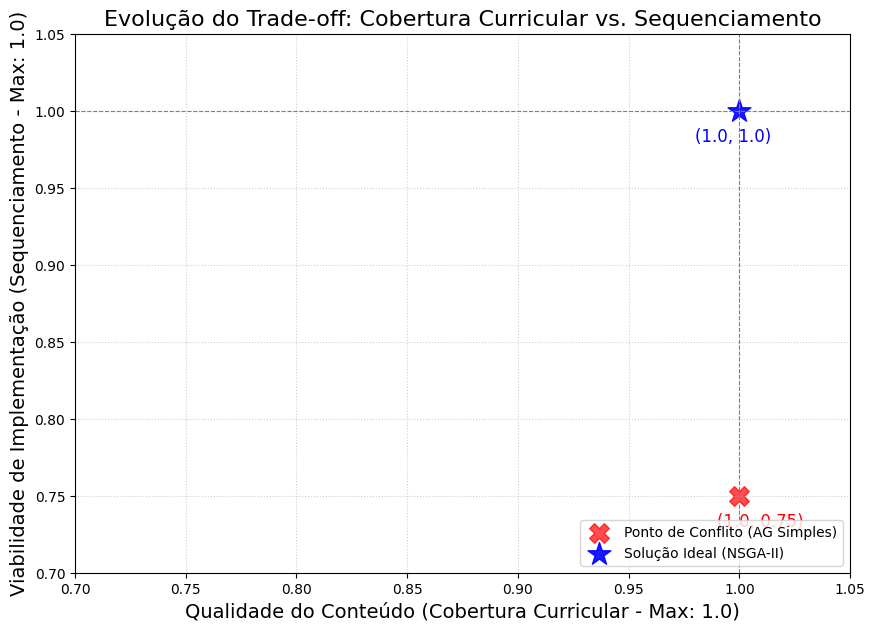

In [ ]:
import matplotlib.pyplot as plt

# Dados simulados para o gráfico (Baseado nos seus resultados)
# Ponto de Conflito (AG Simples - V1)
cobertura_v1 = 1.0
sequenciamento_v1 = 0.75

# Ponto de Solução (NSGA-II - V2)
cobertura_v2 = 1.0
sequenciamento_v2 = 1.0

# Configuração do Gráfico
plt.figure(figsize=(10, 7))

# 1. Plotar o Ponto de Conflito (AG Simples)
plt.scatter(cobertura_v1, sequenciamento_v1, color='red', s=200, marker='X',
            label='Ponto de Conflito (AG Simples)', alpha=0.7)
plt.text(cobertura_v1 * 0.99, sequenciamento_v1 - 0.02,
         f'(1.0, 0.75)', fontsize=12, color='red')

# 2. Plotar o Ponto de Solução (NSGA-II - Front de Pareto)
plt.scatter(cobertura_v2, sequenciamento_v2, color='blue', s=300, marker='*',
            label='Solução Ideal (NSGA-II)', alpha=0.9)
plt.text(cobertura_v2 * 0.98, sequenciamento_v2 - 0.02,
         f'(1.0, 1.0)', fontsize=12, color='blue')

# Linhas de referência para o ponto 1.0
plt.axhline(1.0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(1.0, color='gray', linestyle='--', linewidth=0.8)

# Configurações de Eixos e Títulos
plt.title('Evolução do Trade-off: Cobertura Curricular vs. Sequenciamento', fontsize=16)
plt.xlabel('Qualidade do Conteúdo (Cobertura Curricular - Max: 1.0)', fontsize=14)
plt.ylabel('Viabilidade de Implementação (Sequenciamento - Max: 1.0)', fontsize=14)
plt.xlim(0.7, 1.05)
plt.ylim(0.7, 1.05)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='lower right')

plt.show()